In [161]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [162]:
df = pd.read_csv("Copper_Set.csv", low_memory= False)

In [163]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [165]:
df.duplicated().sum()

np.int64(0)

In [166]:
df['id'].nunique()

181671

In [167]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [168]:
df['delivery date'].dtype

dtype('<M8[ns]')

In [169]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce').round(2)

In [170]:
df['quantity tons']

0           54.15
1          768.02
2          386.13
3          202.41
4          785.53
           ...   
181668     102.48
181669     208.09
181670       4.24
181671   -2000.00
181672     406.69
Name: quantity tons, Length: 181673, dtype: float64

In [171]:
df['quantity tons'].dtype

dtype('float64')

In [172]:
df['product_ref'].value_counts()

product_ref
611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

In [173]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [174]:
# Feature Engineering
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [175]:
# For item_date
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_day'] = df['item_date'].dt.day
df['item_dayofweek'] = df['item_date'].dt.dayofweek

# For delivery_date
df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_day'] = df['delivery date'].dt.day
df['delivery_dayofweek'] = df['delivery date'].dt.dayofweek

In [176]:
# Frequency encoding
customer_frequency = df['customer'].value_counts()
df['customer_frequency'] = df['customer'].map(customer_frequency)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   181671 non-null  object        
 1   item_date            181670 non-null  datetime64[ns]
 2   quantity tons        181672 non-null  float64       
 3   customer             181672 non-null  float64       
 4   country              181645 non-null  float64       
 5   status               181671 non-null  object        
 6   item type            181673 non-null  object        
 7   application          181649 non-null  float64       
 8   thickness            181672 non-null  float64       
 9   width                181673 non-null  float64       
 10  material_ref         103754 non-null  object        
 11  product_ref          181673 non-null  int64         
 12  delivery date        181670 non-null  datetime64[ns]
 13  selling_price 

In [178]:
df.isnull().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
item_year                  3
item_month                 3
item_day                   3
item_dayofweek             3
delivery_year              3
delivery_month             3
delivery_day               3
delivery_dayofweek         3
customer_frequency         1
dtype: int64

In [179]:
df['material_ref'].nunique()

16563

In [180]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency
0,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0,2021.0,4.0,1.0,3.0,2021.0,7.0,1.0,3.0,1919.0
1,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,2021.0,4.0,1.0,3.0,2021.0,4.0,1.0,3.0,2570.0
2,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,40.0
3,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,131.0
4,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0,2021.0,4.0,1.0,3.0,2021.0,3.0,1.0,0.0,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0
181669,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0
181670,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0
181671,-2000.00,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0


In [181]:
df.isnull().sum()

quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           1
delivery_time_taken     6
item_year               3
item_month              3
item_day                3
item_dayofweek          3
delivery_year           3
delivery_month          3
delivery_day            3
delivery_dayofweek      3
customer_frequency      1
dtype: int64

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,10.97,30.36,6.716000e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.00,30205242.00,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.00,30.00,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.00,15.00,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.70,1.50,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.00,1250.00,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.00,640665.00,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.00,812.00,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,29.00,61.00,9.700000e+01,6.890000e+02
item_year,181670.0,2.020390e+03,4.878030e-01,2020.00,2020.00,2020.00,2.021000e+03,2.021000e+03


In [183]:
# quantity and selling price values are not below 0. so we convert to null for below 0 value

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181663.0,5.875228e+03,2.349139e+06,0.01,10.97,30.37,6.716000e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.00,30205242.00,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.00,30.00,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.00,15.00,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.70,1.50,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.00,1250.00,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.00,640665.00,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10,669.00,812.00,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,29.00,61.00,9.700000e+01,6.890000e+02
item_year,181670.0,2.020390e+03,4.878030e-01,2020.00,2020.00,2020.00,2.021000e+03,2.021000e+03


In [184]:
df.isnull().sum()

quantity tons          10
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
item_year               3
item_month              3
item_day                3
item_dayofweek          3
delivery_year           3
delivery_month          3
delivery_day            3
delivery_dayofweek      3
customer_frequency      1
dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        181663 non-null  float64
 1   customer             181672 non-null  float64
 2   country              181645 non-null  float64
 3   status               181671 non-null  object 
 4   item type            181673 non-null  object 
 5   application          181649 non-null  float64
 6   thickness            181672 non-null  float64
 7   width                181673 non-null  float64
 8   product_ref          181673 non-null  int64  
 9   selling_price        181665 non-null  float64
 10  delivery_time_taken  181667 non-null  float64
 11  item_year            181670 non-null  float64
 12  item_month           181670 non-null  float64
 13  item_day             181670 non-null  float64
 14  item_dayofweek       181670 non-null  float64
 15  delivery_year    

In [186]:
# Calculate skewness for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_cols].skew()

# Display the skewness values of each numerical column
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
quantity tons          424.679128
customer                86.985069
country                  0.753595
application              0.724359
thickness              303.446799
width                    0.374597
product_ref              1.015216
selling_price          301.381452
delivery_time_taken      0.469719
item_year                0.450066
item_month              -0.187618
item_day                 0.066514
item_dayofweek           0.259465
delivery_year           -0.747184
delivery_month           0.128178
delivery_day             0.000000
delivery_dayofweek      -0.218397
customer_frequency       1.734856
dtype: float64


In [187]:
# Step 2: Handle missing values based on skewness
for col in numerical_cols:
    if skewness[col] > 0.5:  # Positively skewed
        df[col] = df[col].fillna(df[col].median())
    elif skewness[col] < -0.5:  # Negatively skewed
        df[col] = df[col].fillna(df[col].median())
    else:  # Close to normal distribution
        df[col] = df[col].fillna(df[col].mean())

# For categorical columns, use mode to fill missing values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [188]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
item_year              0
item_month             0
item_day               0
item_dayofweek         0
delivery_year          0
delivery_month         0
delivery_day           0
delivery_dayofweek     0
customer_frequency     0
dtype: int64

In [189]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency
0,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0,2021.0,4.0,1.0,3.0,2021.0,7.0,1.0,3.0,1919.0
1,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,2021.0,4.0,1.0,3.0,2021.0,4.0,1.0,3.0,2570.0
2,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,40.0
3,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,131.0
4,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0,2021.0,4.0,1.0,3.0,2021.0,3.0,1.0,0.0,584.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        181673 non-null  float64
 1   customer             181673 non-null  float64
 2   country              181673 non-null  float64
 3   status               181673 non-null  object 
 4   item type            181673 non-null  object 
 5   application          181673 non-null  float64
 6   thickness            181673 non-null  float64
 7   width                181673 non-null  float64
 8   product_ref          181673 non-null  int64  
 9   selling_price        181673 non-null  float64
 10  delivery_time_taken  181673 non-null  float64
 11  item_year            181673 non-null  float64
 12  item_month           181673 non-null  float64
 13  item_day             181673 non-null  float64
 14  item_dayofweek       181673 non-null  float64
 15  delivery_year    

In [191]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'delivery_time_taken', 'item_year', 'item_month', 'item_day',
       'item_dayofweek', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_dayofweek', 'customer_frequency'],
      dtype='object')

In [192]:
# List of columns to convert
columns_to_convert = ['quantity tons', 'customer', 'country', 'application', 'delivery_time_taken','item_year',
                        'item_month', 'item_day', 'item_dayofweek', 'delivery_year', 'delivery_month', 'delivery_day',
                        'delivery_dayofweek', 'customer_frequency']

# Loop through the list and convert each column to int
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [193]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency
0,54,30156308,28,Won,W,10,2.00,1500.0,1670798778,854.00,91,2021,4,1,3,2021,7,1,3,1919
1,768,30202938,25,Won,W,41,0.80,1210.0,1668701718,1047.00,0,2021,4,1,3,2021,4,1,3,2570
2,386,30153963,30,Won,WI,28,0.38,952.0,628377,644.33,90,2021,4,1,3,2021,1,1,4,40
3,202,30349574,32,Won,S,59,2.30,1317.0,1668701718,768.00,90,2021,4,1,3,2021,1,1,4,131
4,785,30211560,28,Won,W,10,4.00,2000.0,640665,577.00,31,2021,4,1,3,2021,3,1,0,584


In [194]:
#checking the skew for each features
all_columns = ['quantity tons', 'customer', 'country',
                'application', 'thickness', 'width', 'product_ref', 'selling_price',
                'delivery_time_taken', 'item_year', 'item_month', 'item_day',
                'item_dayofweek', 'delivery_year', 'delivery_month', 'delivery_day',
                'delivery_dayofweek', 'customer_frequency']
for col in all_columns:
    print(col)
    print(df[col].skew())

quantity tons
424.6908164261195
customer
86.98530835413473
country
0.7538348729685946
application
0.7245643807542177
thickness
303.4475711614558
width
0.3745967719109581
product_ref
1.0152155732872308
selling_price
301.3880881607121
delivery_time_taken
0.46972673681124943
item_year
0.4500933548934831
item_month
-0.18761059330526825
item_day
0.06651564320091793
item_dayofweek
0.2594925147113587
delivery_year
-0.7472099925110228
delivery_month
0.12818914285477762
delivery_day
0.0
delivery_dayofweek
-0.2183696183174626
customer_frequency
1.7348650525440796


In [195]:
# Positively skewed: quantity tons, customer, thickness, selling_price

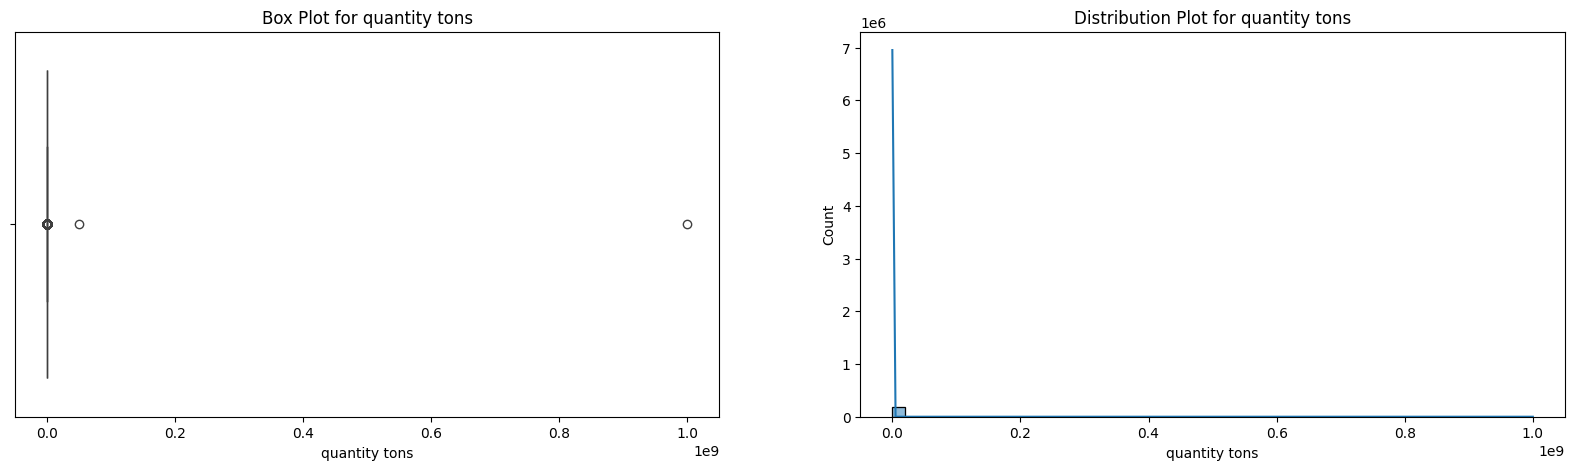

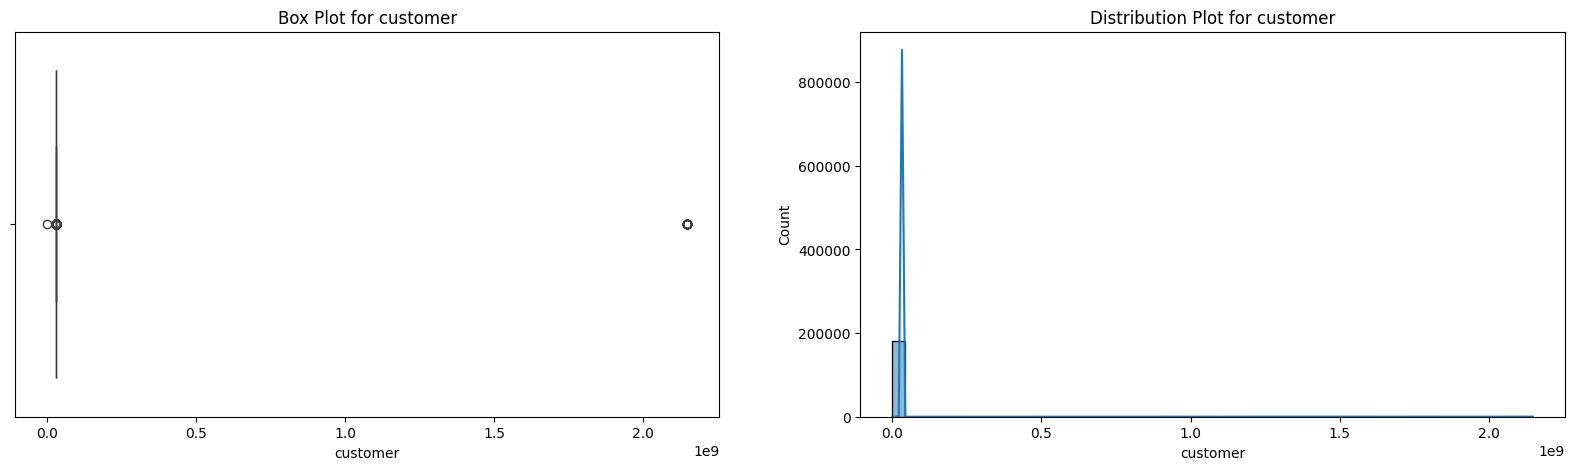

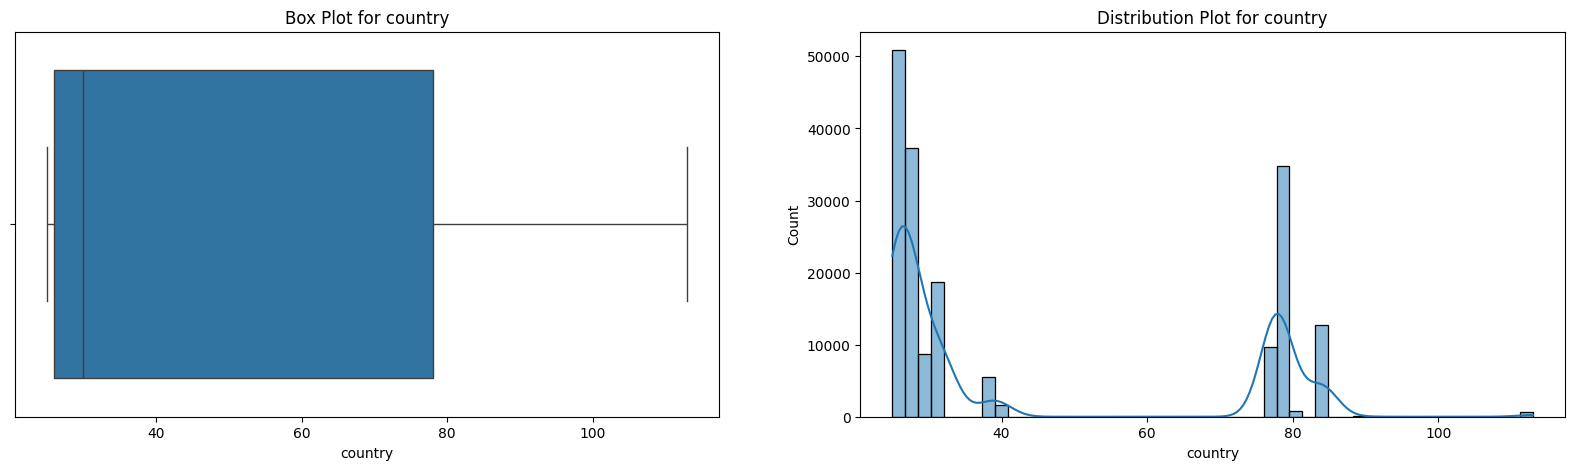

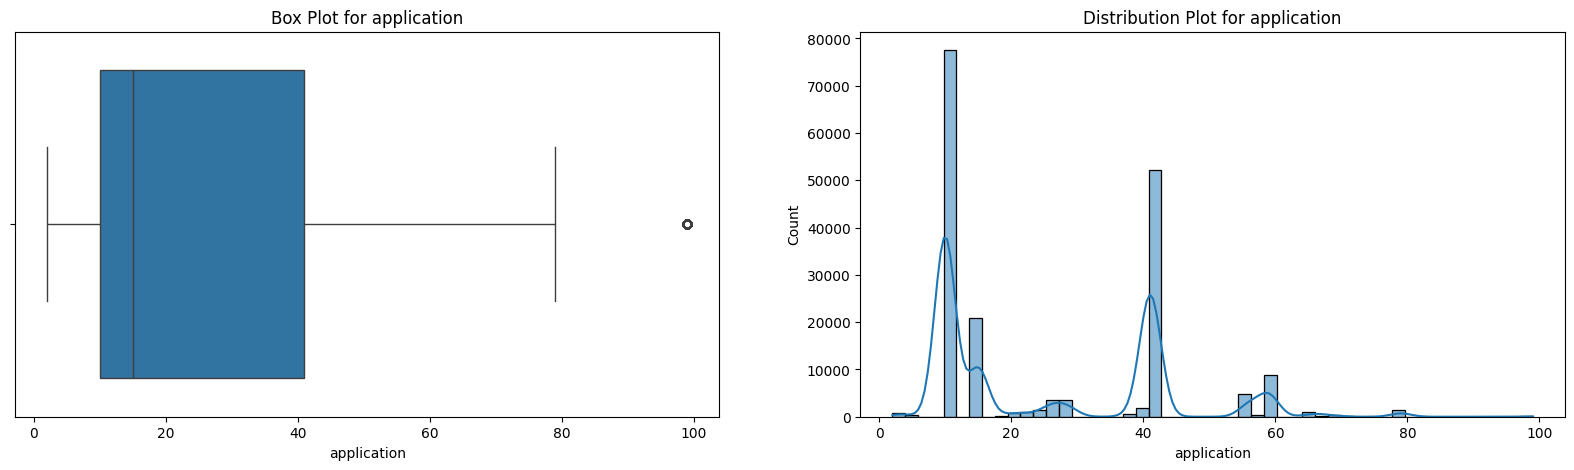

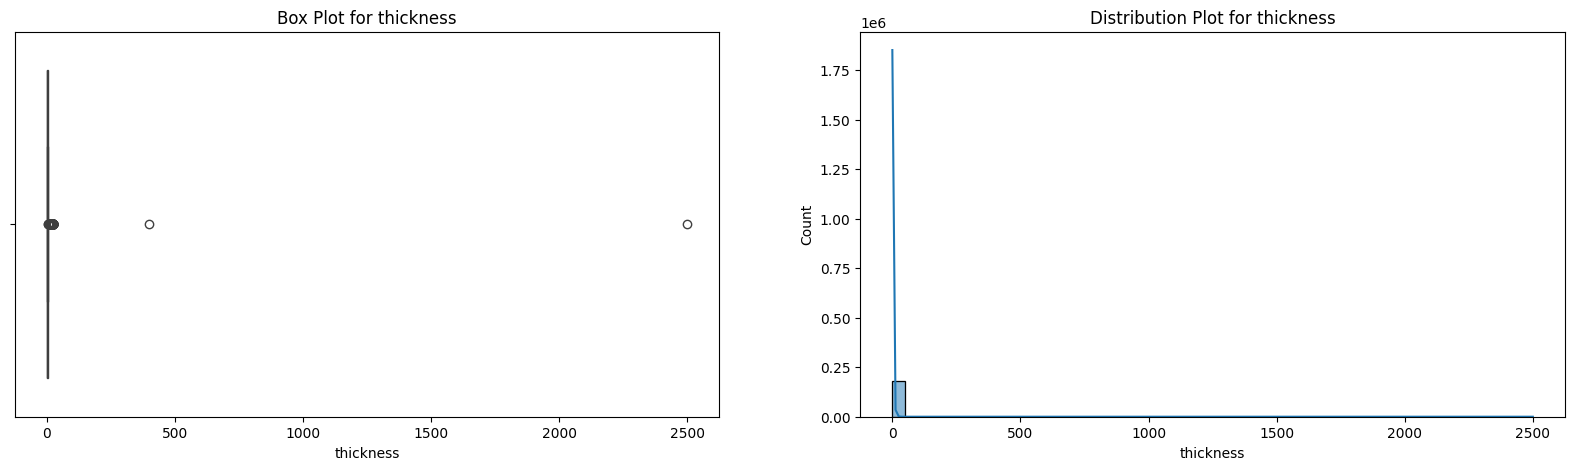

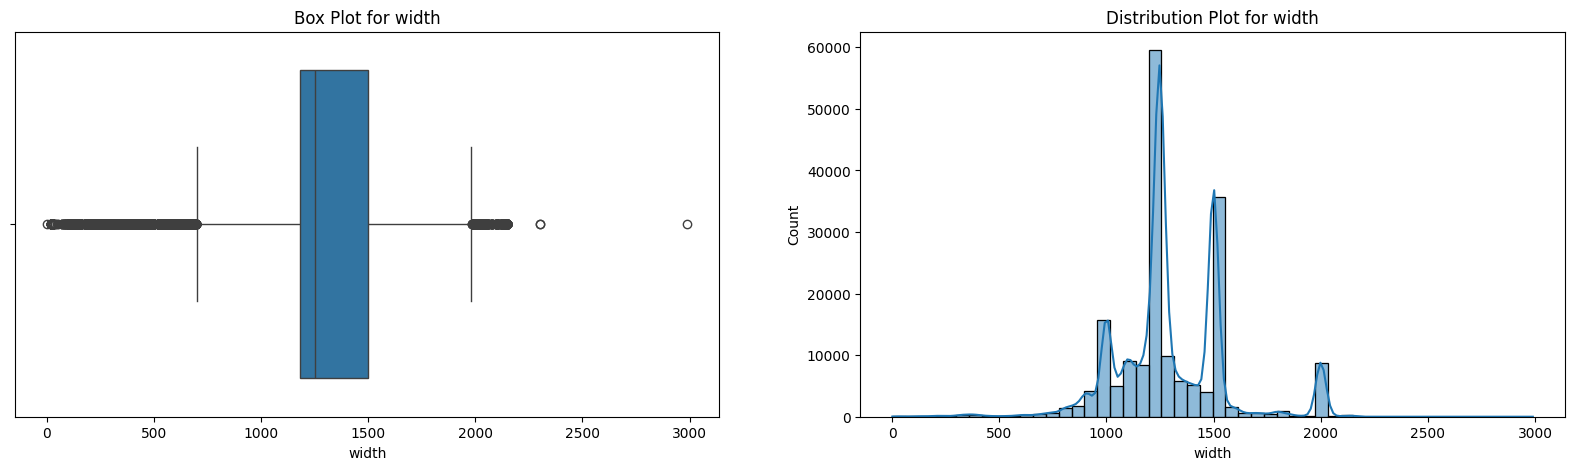

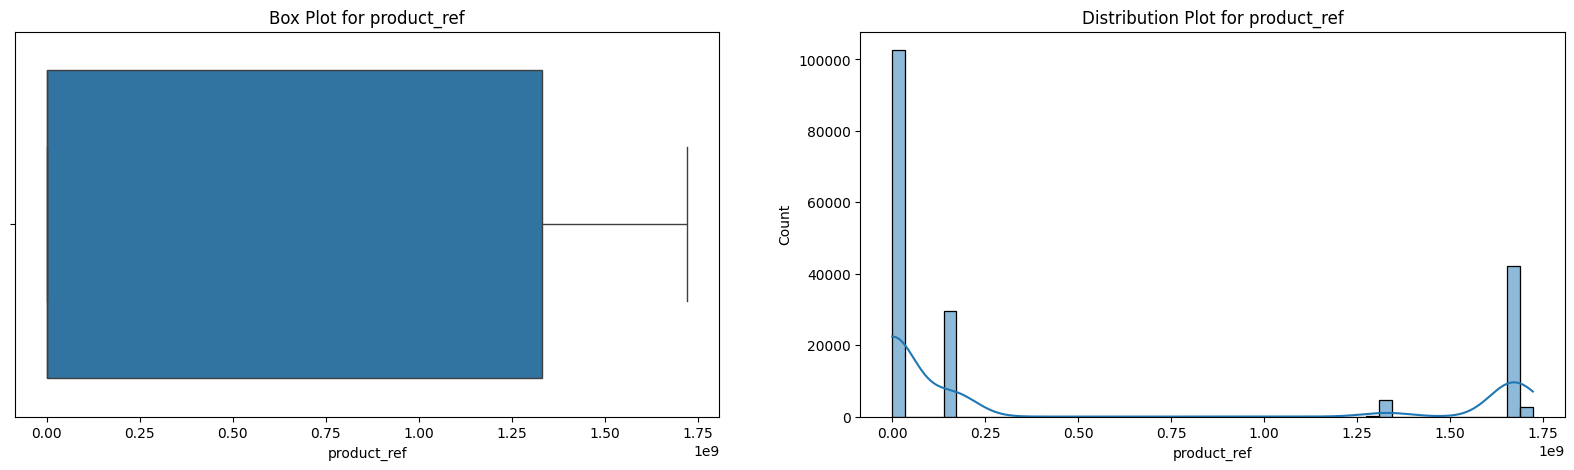

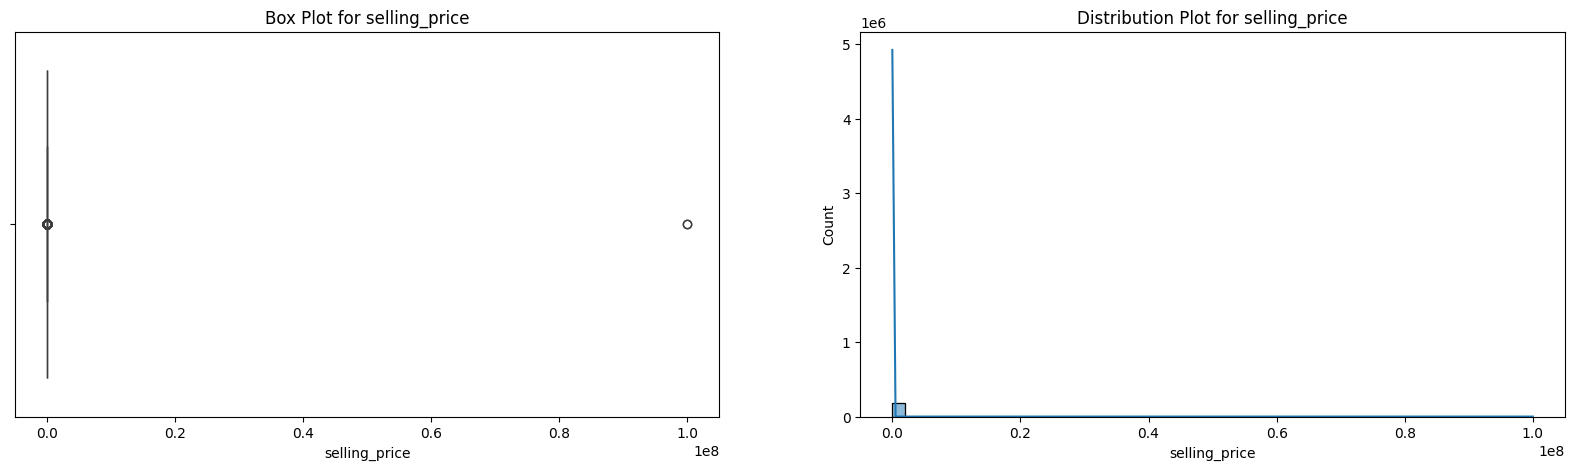

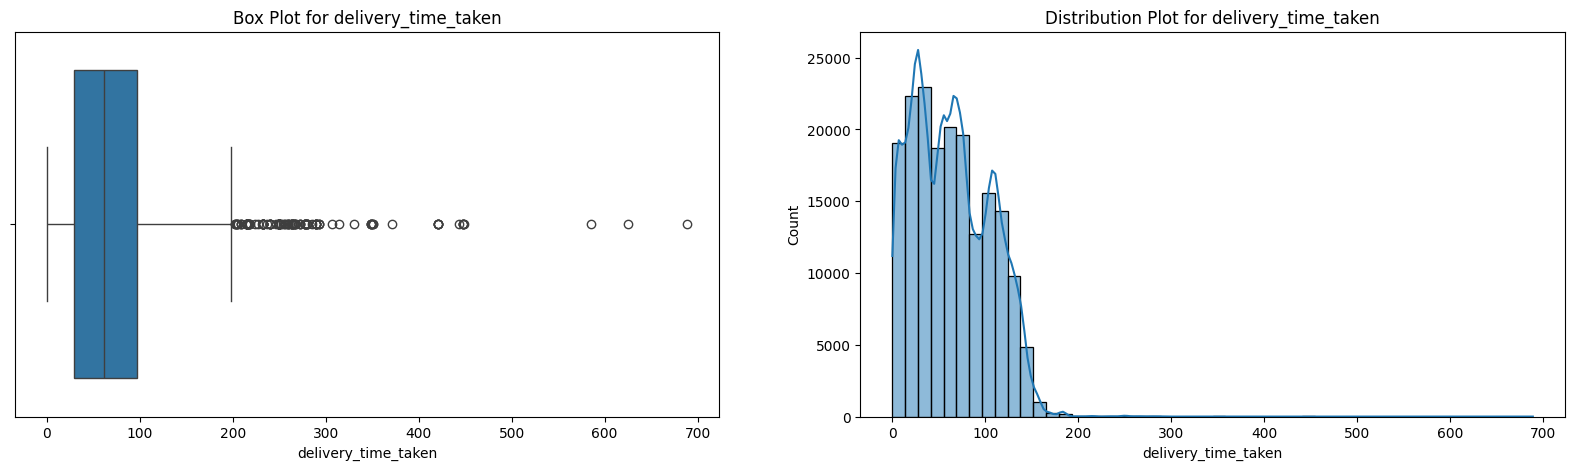

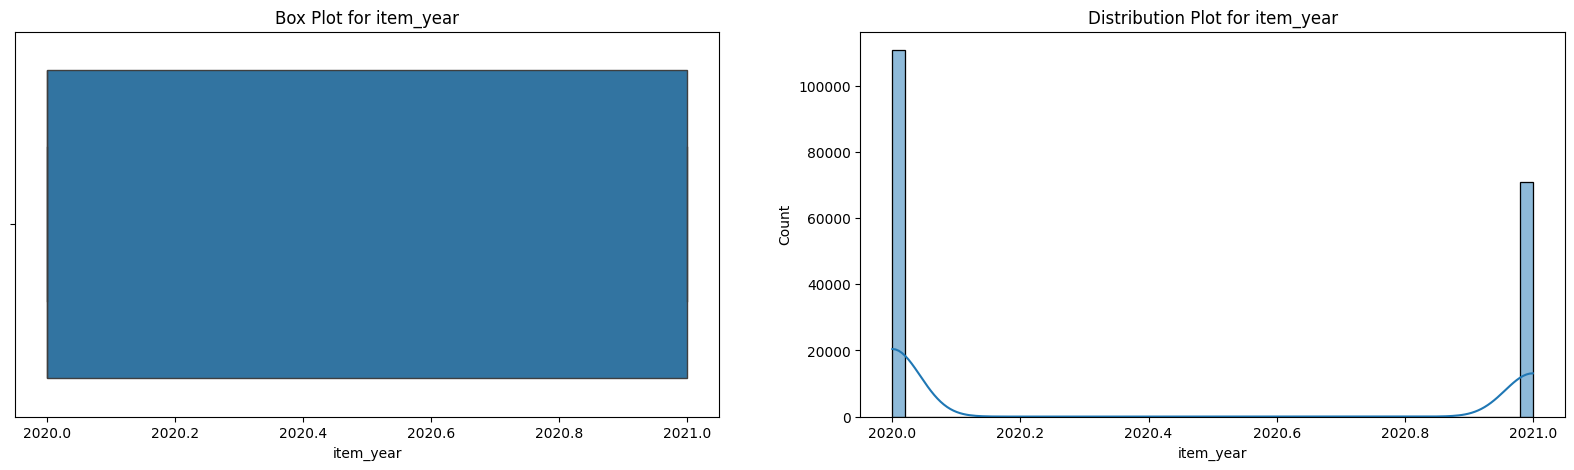

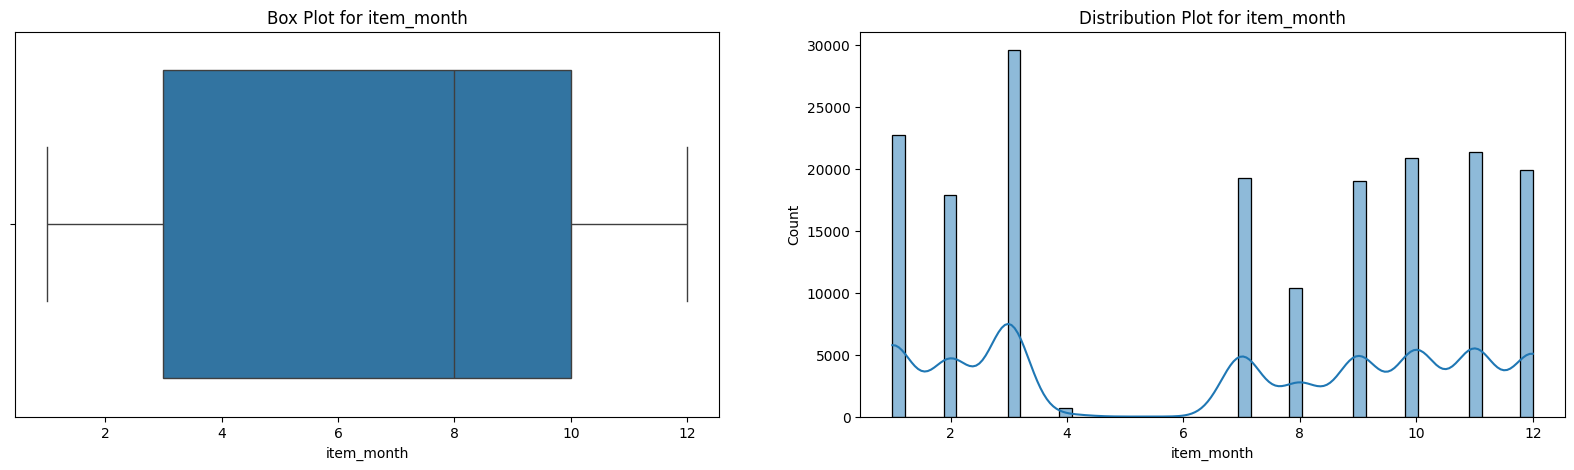

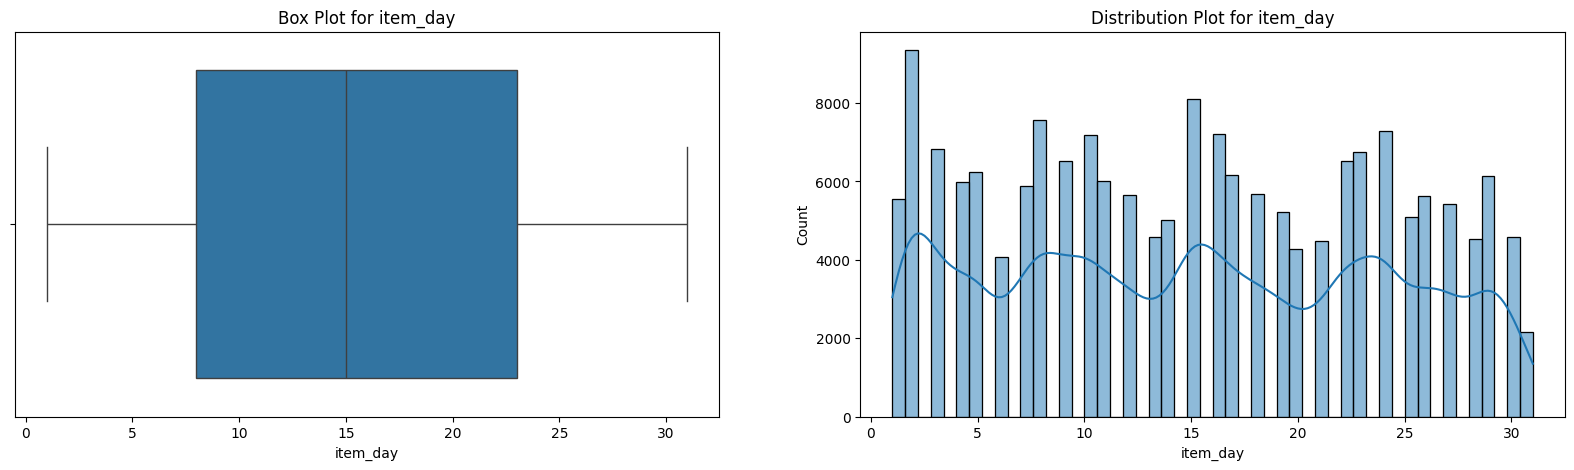

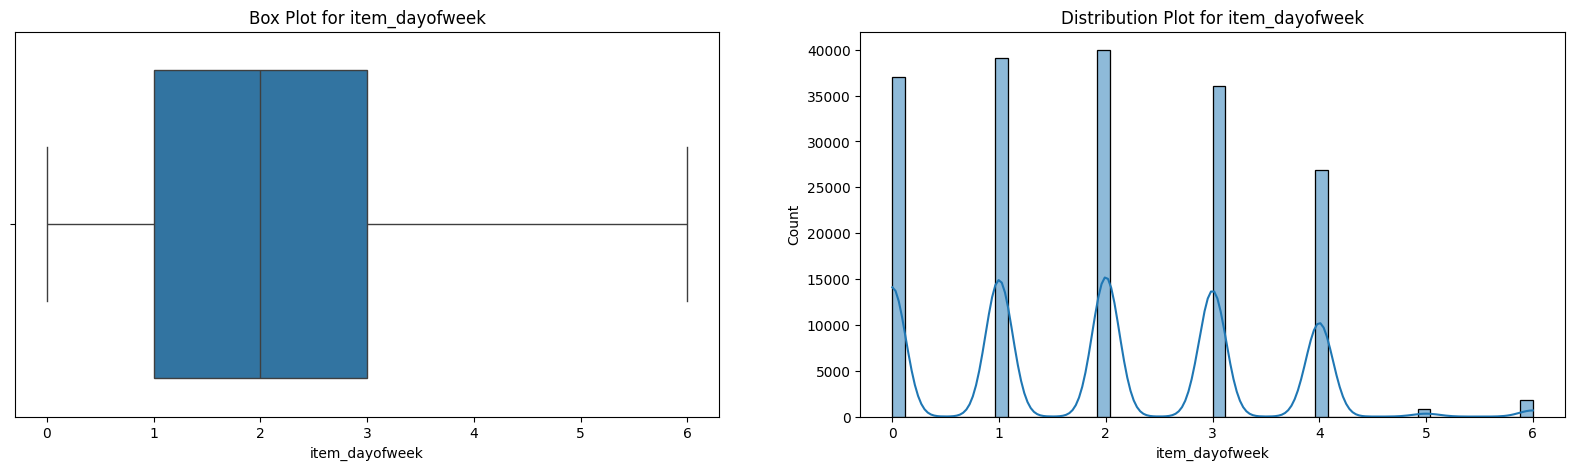

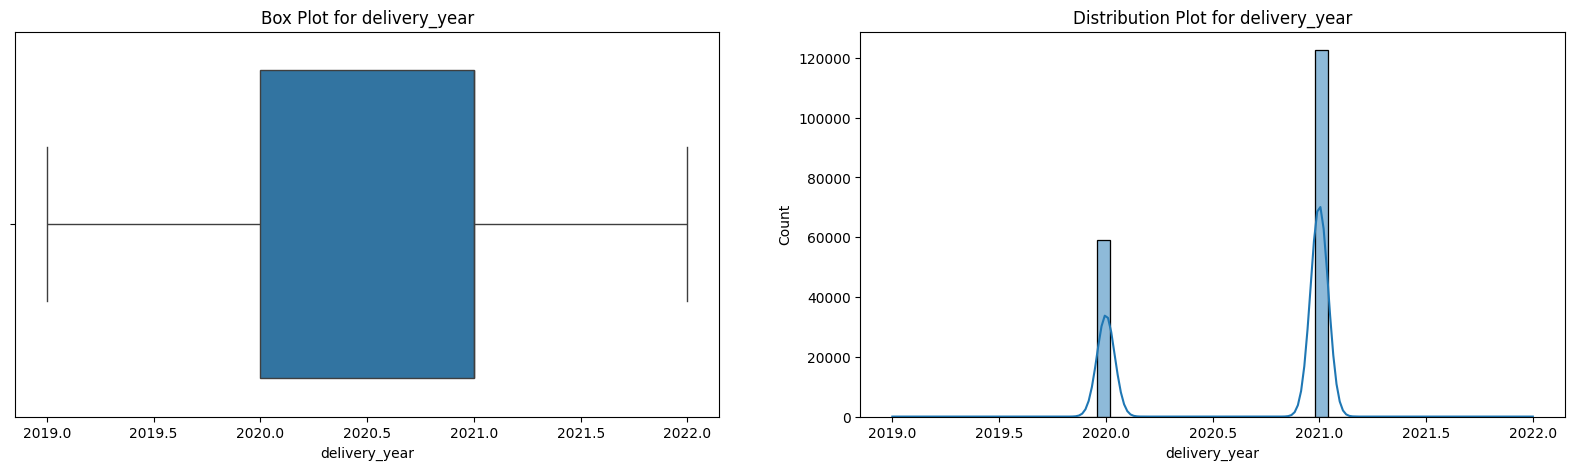

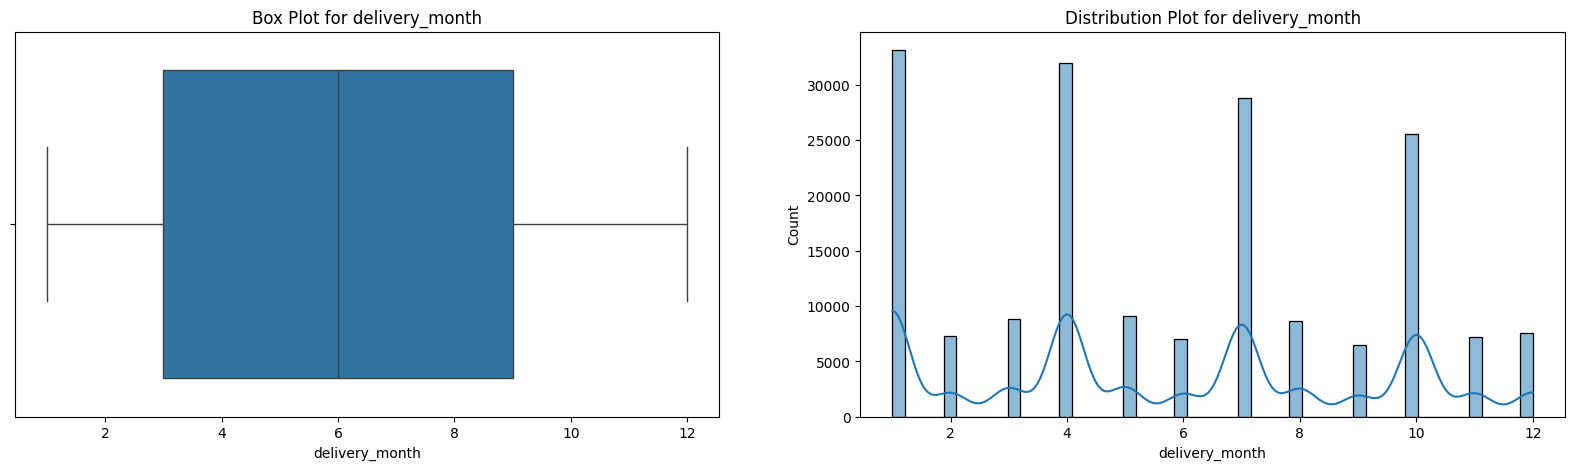

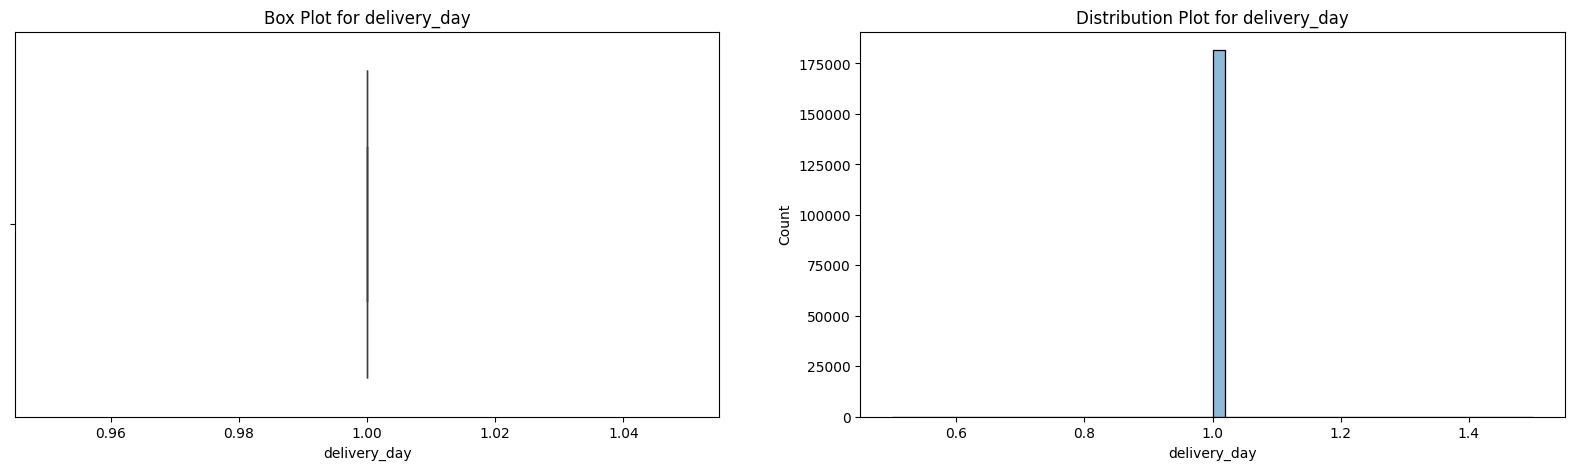

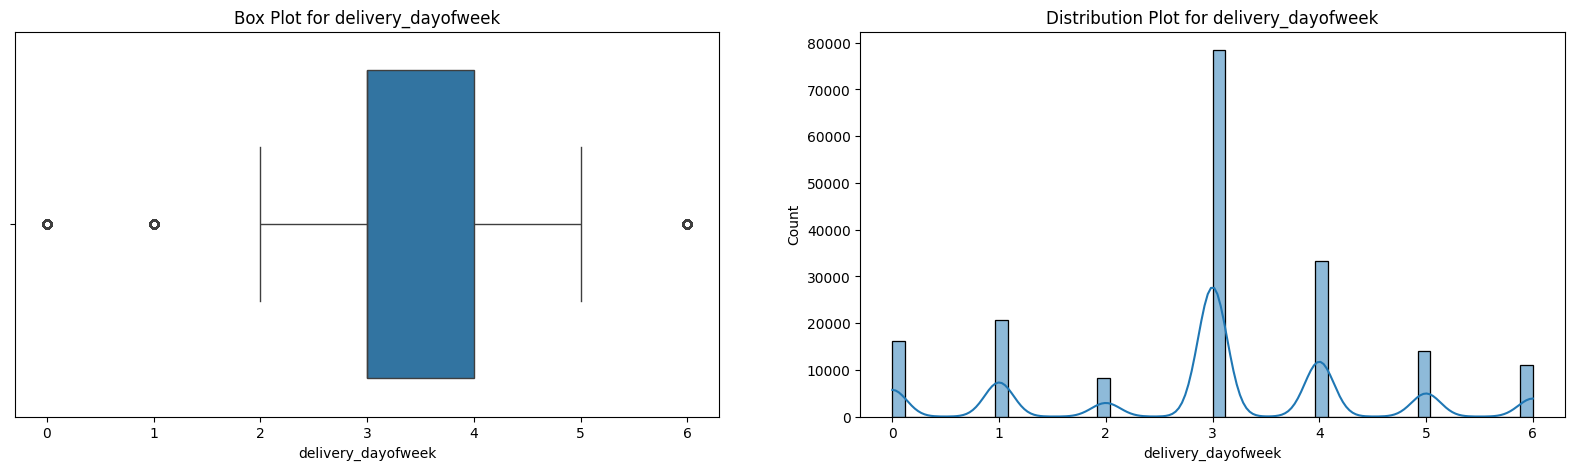

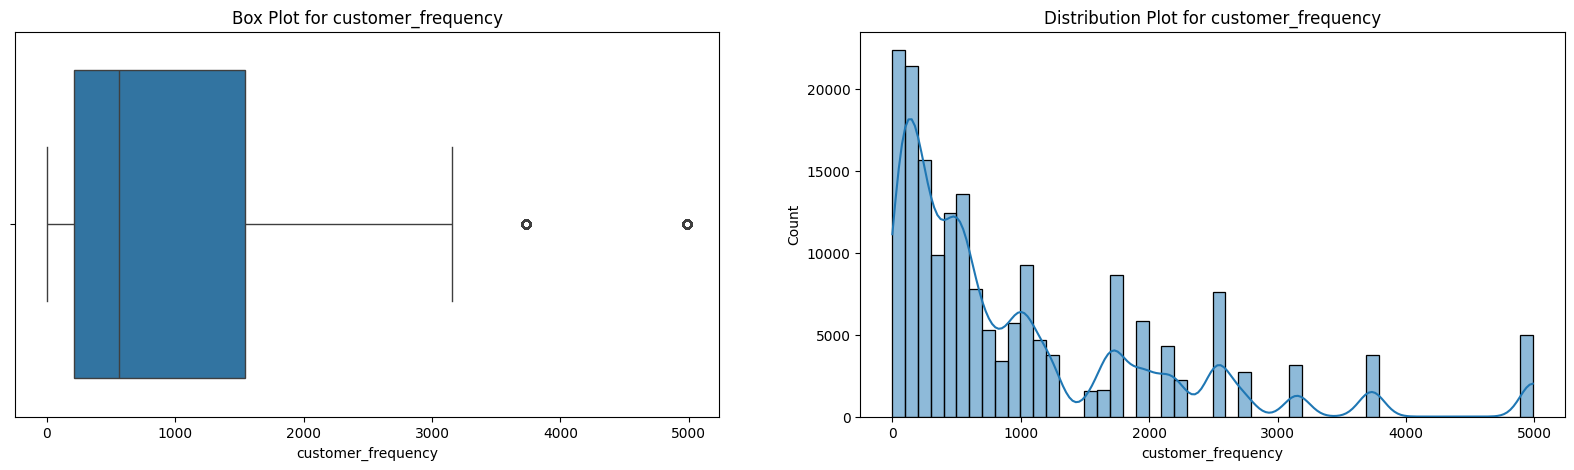

In [196]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

col = ['quantity tons', 'customer', 'country',
                'application', 'thickness', 'width', 'product_ref', 'selling_price',
                'delivery_time_taken', 'item_year', 'item_month', 'item_day',
                'item_dayofweek', 'delivery_year', 'delivery_month', 'delivery_day',
                'delivery_dayofweek', 'customer_frequency']
for i in col:
    plot(df, i)

In [197]:
highly_skewed_columns = ['quantity tons', 'thickness', 'selling_price', 'customer_frequency']

df_log_transformed = df.copy()

# Log Transformation (add small value to avoid log(0))
for col in highly_skewed_columns:
    df_log_transformed[col] = np.log1p(df[col])  # log(x + 1)

# Check skewness after transformations
print("Skewness After Log Transformation:")
print(df_log_transformed[highly_skewed_columns].skew())




Skewness After Log Transformation:
quantity tons         0.225532
thickness             0.862494
selling_price        -5.275578
customer_frequency   -0.581392
dtype: float64


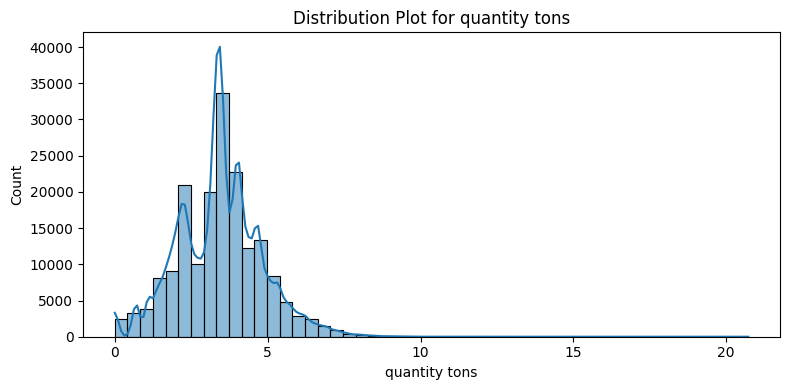

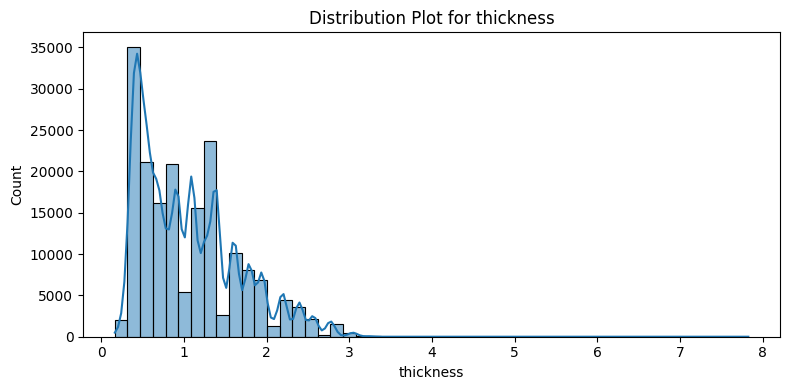

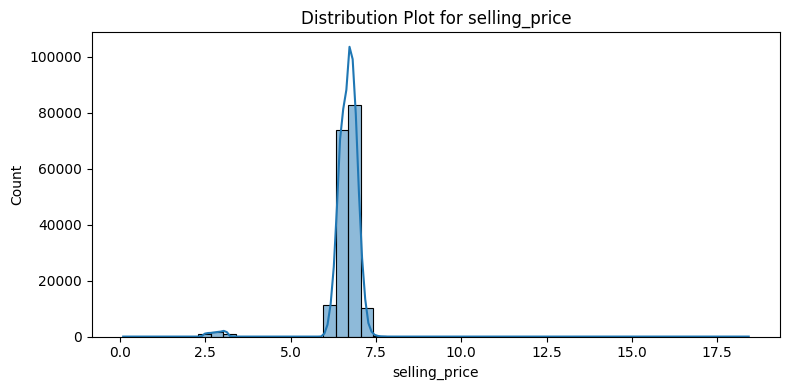

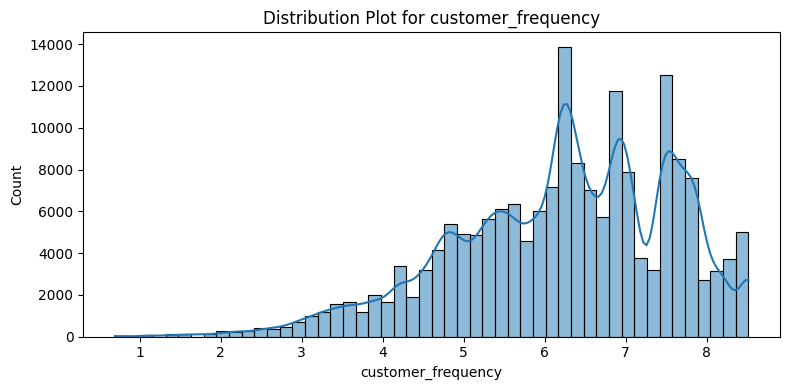

In [198]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    sns.histplot(data=df, x=column, kde=True, bins=50)  # Plot histogram with KDE
    plt.title(f'Distribution Plot for {column}')
    plt.tight_layout()
    plt.show()

col = ['quantity tons','thickness','selling_price', 'customer_frequency']
for i in col:
    plot(df_log_transformed, i)

In [199]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [200]:
# using outlier function handle the outliers for the below features

outlier(df_log_transformed,'quantity tons')
outlier(df_log_transformed,'thickness')
outlier(df_log_transformed,'selling_price')
outlier(df_log_transformed,'width')
df_log_transformed

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency
0,4.007333,30156308,28,Won,W,10,1.098612,1500.0,1670798778,6.751101,91,2021,4,1,3,2021,7,1,3,7.560080
1,6.645091,30202938,25,Won,W,41,0.587787,1210.0,1668701718,6.954639,0,2021,4,1,3,2021,4,1,3,7.852050
2,5.958425,30153963,30,Won,WI,28,0.322083,952.0,628377,6.469762,90,2021,4,1,3,2021,1,1,4,3.713572
3,5.313206,30349574,32,Won,S,59,1.193922,1317.0,1668701718,6.645091,90,2021,4,1,3,2021,1,1,4,4.882802
4,6.666957,30211560,28,Won,W,10,1.609438,1980.0,640665,6.359574,31,2021,4,1,3,2021,3,1,0,6.371612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.634729,30200854,25,Won,W,41,0.672944,1220.0,164141591,6.383507,1,2020,7,2,3,2020,7,1,2,7.573531
181669,5.342334,30200854,25,Won,W,41,0.667829,1500.0,164141591,6.380123,1,2020,7,2,3,2020,7,1,2,7.573531
181670,1.609438,30200854,25,Won,W,41,0.536493,1250.0,164141591,6.429719,1,2020,7,2,3,2020,7,1,2,7.573531
181671,3.433987,30200854,25,Won,W,41,0.615186,1250.0,164141591,6.400257,1,2020,7,2,3,2020,7,1,2,7.573531


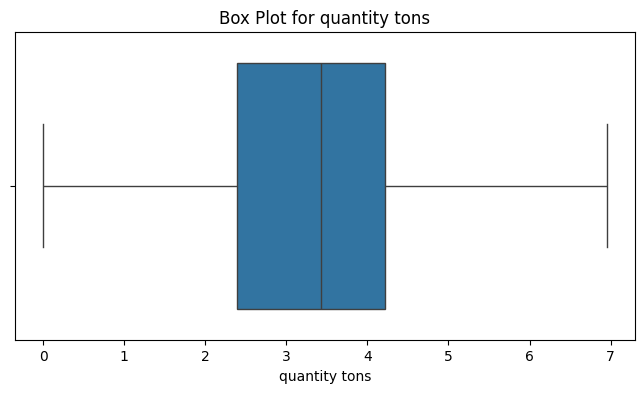

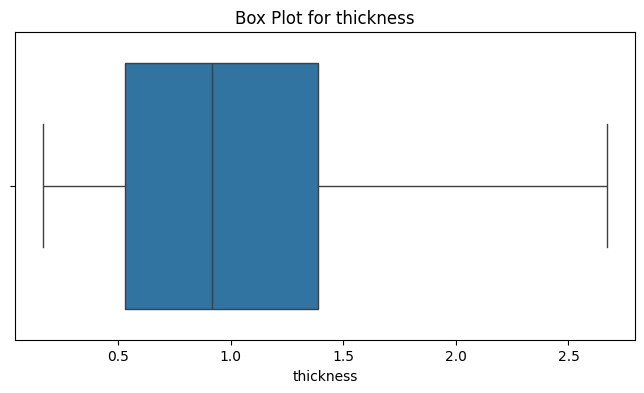

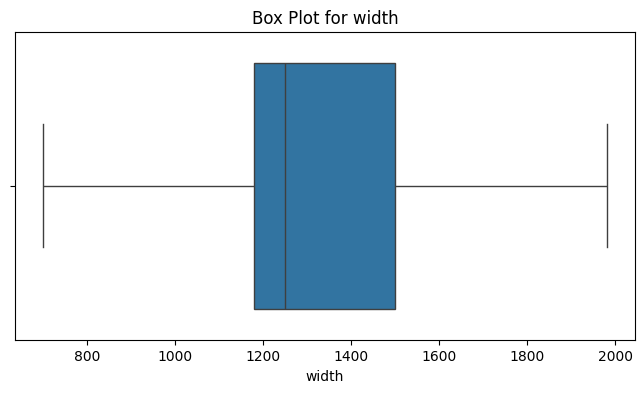

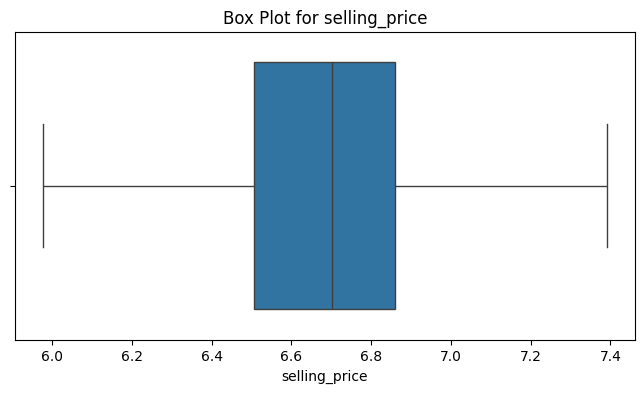

In [201]:
def plot(df, column):
    plt.figure(figsize=(8, 4))   
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')


col = ['quantity tons', 'thickness', 'width', 'selling_price']
for i in col:
    plot(df_log_transformed, i)

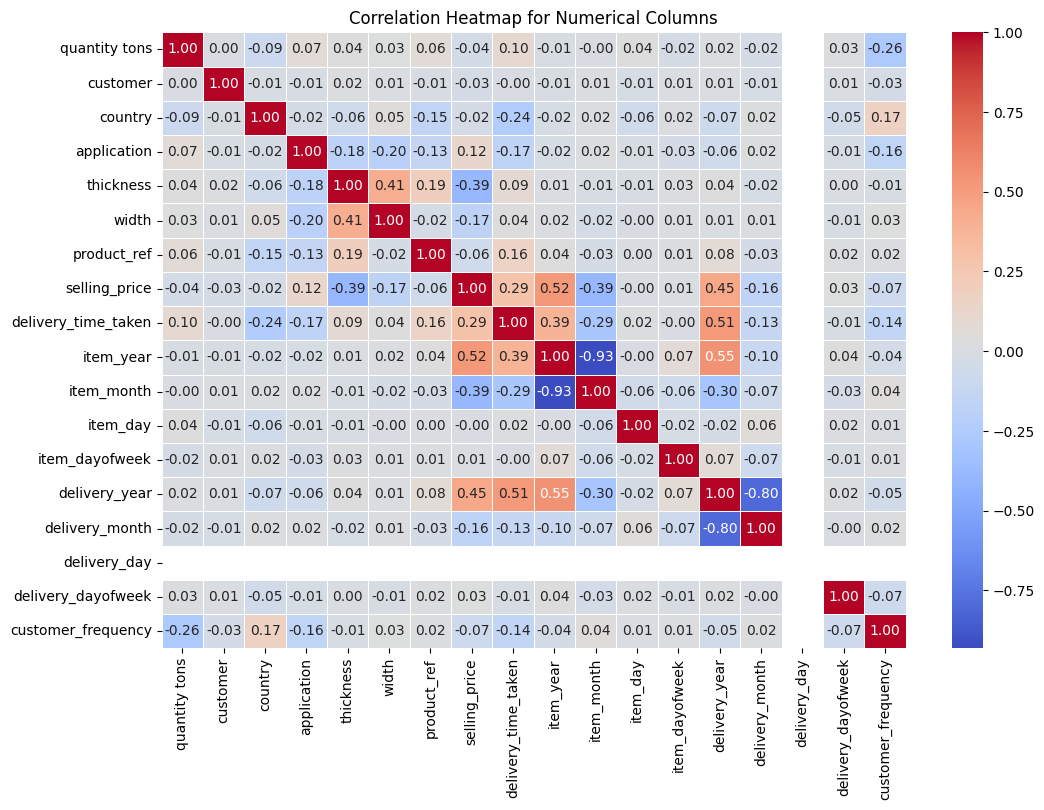

In [202]:
# verify any columns are highly correlated using Heatmap

df_numerical = df_log_transformed.select_dtypes(include=['number'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

# High correlation between features (e.g., above 0.8 or below -0.8) suggests that some features might be redundant,
# and you can consider removing one of them to avoid multicollinearity.

In [146]:
df_log_transformed['delivery_day'].value_counts()

delivery_day
1    181673
Name: count, dtype: int64

In [203]:
df_log_transformed.drop(columns=['delivery_day', 'delivery_month','item_month'], inplace=True)

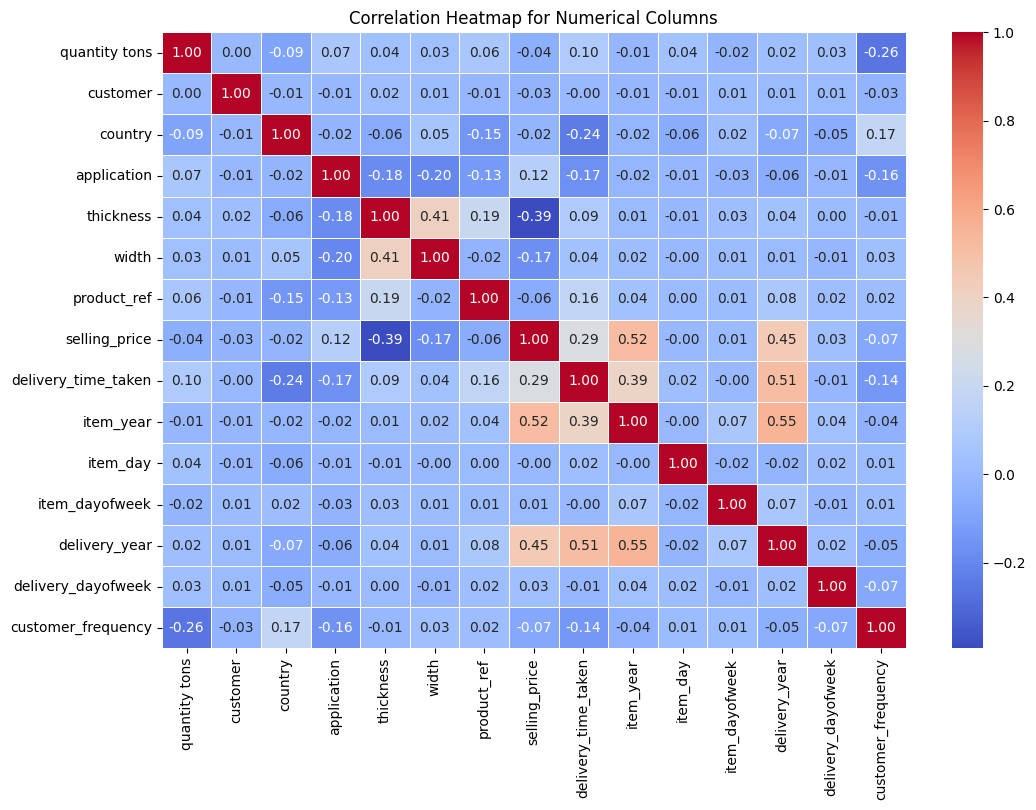

In [204]:
df_numerical = df_log_transformed.select_dtypes(include=['number'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [205]:
df_log_transformed.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency
0,4.007333,30156308,28,Won,W,10,1.098612,1500.0,1670798778,6.751101,91,2021,1,3,2021,3,7.560080
1,6.645091,30202938,25,Won,W,41,0.587787,1210.0,1668701718,6.954639,0,2021,1,3,2021,3,7.852050
2,5.958425,30153963,30,Won,WI,28,0.322083,952.0,628377,6.469762,90,2021,1,3,2021,4,3.713572
3,5.313206,30349574,32,Won,S,59,1.193922,1317.0,1668701718,6.645091,90,2021,1,3,2021,4,4.882802
4,6.666957,30211560,28,Won,W,10,1.609438,1980.0,640665,6.359574,31,2021,1,3,2021,0,6.371612


In [210]:
df_log_transformed['item_year'].value_counts()

item_year
2020    110780
2021     70893
Name: count, dtype: int64